### Import Libraries

In [1]:
import sys
sys.path.append('../')

from awpy.parser.demoparser import DemoParser
from awpy.analytics.map_control import extract_player_positions, calc_map_control, calculate_round_map_control_metrics
from awpy.visualization.plot import plot_map_control_snapshot, plot_frame_map_control, create_round_map_control_gif, plot_map_control_metrics, save_map_control_graphic

import os
import matplotlib
%matplotlib inline

### Import and Parse Demo

In [2]:
demo_filepath = "../../../../data/videos/ELEAGUE-Major2018-faze-vs-cloud9-bo3/faze-vs-cloud9-m3-inferno.dem"

demo_parser = DemoParser(demofile = demo_filepath, demo_id = "FAZE-C9-Inferno", parse_rate=128)

# Parse the demofile, output results to a dictionary and a dataframe.
#data_df = demo_parser.parse(return_type="df")
data = demo_parser.parse()


### Calculate and Visualize Frame Map Control Values

The following functions can be used to visualize the map control progress for an entire round.

* `extract_player_positions` can be used to extract alive player positions for both teams
* `calc_map_control` can be used to calculate map control values for each side for a given frame
* `plot_map_control_snapshot` can be used to visualize map control and player positions for a given set of map control dictionaries  
* `plot_frame_map_control` can be used to visualize map control and player positions for a given frame

In [3]:
'''
Parse frame to extract alive player locations
'''
player_positions = extract_player_positions(data['gameRounds'][29]['frames'][8])

In [4]:
'''
Calculate map control values for tiles based on
current player positions in given frame
'''
map_control_values = calc_map_control(data['mapName'], data['gameRounds'][29]['frames'][8])

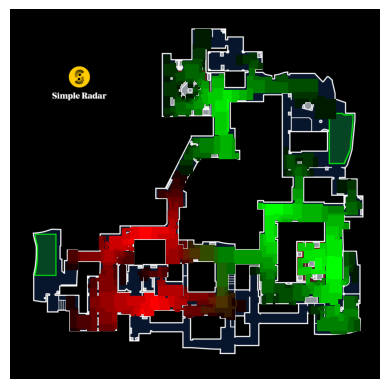

In [5]:
'''
Visualize map control given output from calcMapControl
'''
plot_map_control_snapshot(data['mapName'], map_control_values['ct'], map_control_values['t'])

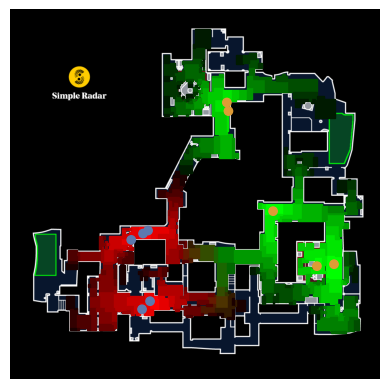

In [6]:
'''
Visualize map control and player positions given output 
from parseRoundFrame and calcMapControl
'''
player_positions = extract_player_positions(data['gameRounds'][29]['frames'][8])
plot_map_control_snapshot(data['mapName'], map_control_values['ct'], map_control_values['t'], player_pos = player_positions)

Some nav tiles don't have any neighboring tiles (such as a boosted spot), which can cause issues with map control calculations/visualizations. So, there is an argument for `calc_map_control` to 'estimate neighbors' for these isolated tiles.

In [4]:
tmpFrame = data['gameRounds'][31]['frames'][8]
player_positions = extract_player_positions(tmpFrame)


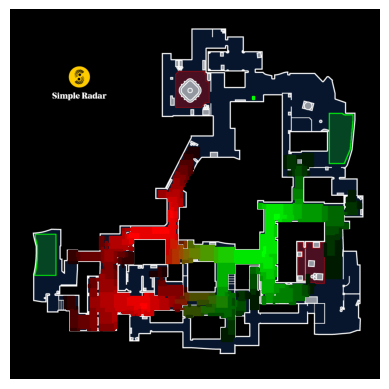

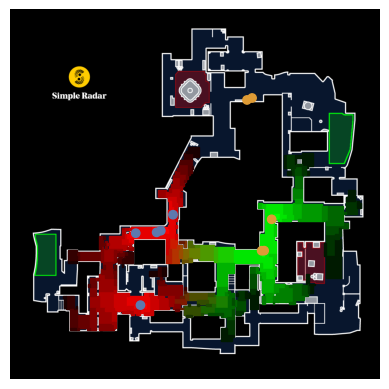

In [5]:
### Without isolated tiles' neighbors approximated
map_control_values = calc_map_control(data['mapName'], tmpFrame, False)
plot_map_control_snapshot(data['mapName'], map_control_values['ct'], map_control_values['t'])
plot_map_control_snapshot(data['mapName'], map_control_values['ct'], map_control_values['t'], player_positions)

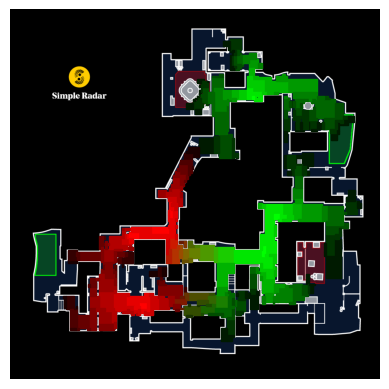

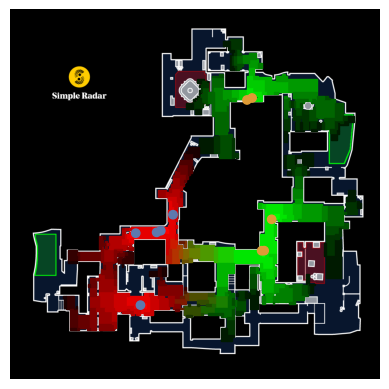

In [6]:
### With isolated tiles' neighbors approximated
map_control_values = calc_map_control(data['mapName'], tmpFrame, True)
plot_map_control_snapshot(data['mapName'], map_control_values['ct'], map_control_values['t'])
plot_map_control_snapshot(data['mapName'], map_control_values['ct'], map_control_values['t'], player_positions)

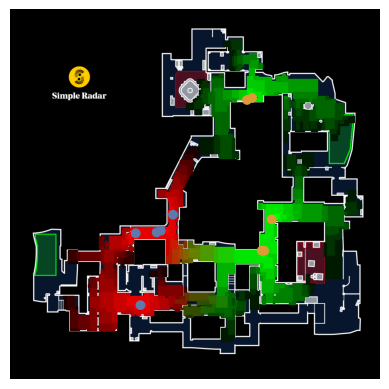

In [7]:
'''
Visualize map control given awpy frame
'''
testFrame = data['gameRounds'][31]['frames'][8]
plot_frame_map_control(data['mapName'], testFrame, players_plotted = True)

### Visualize Map Control for Round

The following functions can be used to visualize the map control progress for an entire round.

* `create_round_map_control_gif` can be used to save a gif to file whose individual frames are similar to the above visualizations. 
* `calculate_round_map_control_metrics` can be used to return a list of map control metrics for a given awpy round
* `plot_map_control_metrics` can be used to generate a plot for a given list of map control metrics
* `save_map_control_graphic` can be used to generate a map control graphic (gif including minimap visualization and map control metric plot) for an entire round and save it to file

In [11]:
'''
Create map control gif for a given awpy frame
'''

testRound = data['gameRounds'][29]
create_round_map_control_gif(data['mapName'], testRound, players_plotted=True, gif_filepath='./results/stewie_inferno_hold_players.gif')

Saving/loading frames
Creating gif!


In [8]:
'''
Generate map control metrics for each frame
in a given awpy round
'''
mcMetrics = calculate_round_map_control_metrics(data['mapName'], data['gameRounds'][29])

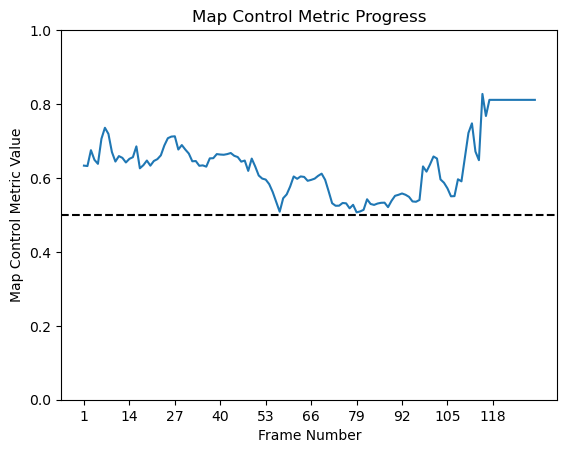

In [9]:
'''
Create plot for given list of map control metrics
'''
plot_map_control_metrics(mcMetrics)

In [10]:
'''
Generate a map control graphic (gif including minimap visualization 
and map control metric plot) for an entire round and save it to file
'''
save_map_control_graphic(map_name=data['mapName'], frames=data['gameRounds'][29]['frames'], save_path='./results/stewie_inferno_hold_mc_graphic.gif')


Saving/loading frames!
Saving map control graphic gif
